In [95]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/solomongreene/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


Here I used a move command in the terminal to move them both to a folder named data

In [5]:
import pandas as pd

# Replace the path with the correct path to your file
file_path = 'data/Fake.csv'

# Read the CSV file
fake_data = pd.read_csv(file_path)

# Print the first row
print(fake_data.iloc[0]['text'])
fake_data.head()


Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t eve

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_path = 'data/True.csv'

true_data = pd.read_csv(true_path)

In [7]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [10]:
# Add a new column 'label' to each dataframe indicating whether it's true or false
fake_data['label'] = 0  # 0 for fake data
true_data['label'] = 1  # 1 for true data

# Combine the two dataframes
combined_data = pd.concat([fake_data, true_data], ignore_index=True)

# Display the combined dataframe
print(combined_data[['text', 'label']].head())


                                                text  label
0  Donald Trump just couldn t wish all Americans ...      0
1  House Intelligence Committee Chairman Devin Nu...      0
2  On Friday, it was revealed that former Milwauk...      0
3  On Christmas day, Donald Trump announced that ...      0
4  Pope Francis used his annual Christmas Day mes...      0


In [11]:
## Preprocessing time:
import nltk
## STEP 1 TOKENIZE ##
from nltk.tokenize import sent_tokenize, word_tokenize
#nltk.download('punkt_tab')
# tokenization into sentences

test_text = combined_data.iloc[0]['text']
test_tokenized = word_tokenize(test_text)

print(test_tokenized)


['Donald', 'Trump', 'just', 'couldn', 't', 'wish', 'all', 'Americans', 'a', 'Happy', 'New', 'Year', 'and', 'leave', 'it', 'at', 'that', '.', 'Instead', ',', 'he', 'had', 'to', 'give', 'a', 'shout', 'out', 'to', 'his', 'enemies', ',', 'haters', 'and', 'the', 'very', 'dishonest', 'fake', 'news', 'media', '.', 'The', 'former', 'reality', 'show', 'star', 'had', 'just', 'one', 'job', 'to', 'do', 'and', 'he', 'couldn', 't', 'do', 'it', '.', 'As', 'our', 'Country', 'rapidly', 'grows', 'stronger', 'and', 'smarter', ',', 'I', 'want', 'to', 'wish', 'all', 'of', 'my', 'friends', ',', 'supporters', ',', 'enemies', ',', 'haters', ',', 'and', 'even', 'the', 'very', 'dishonest', 'Fake', 'News', 'Media', ',', 'a', 'Happy', 'and', 'Healthy', 'New', 'Year', ',', 'President', 'Angry', 'Pants', 'tweeted', '.', '2018', 'will', 'be', 'a', 'great', 'year', 'for', 'America', '!', 'As', 'our', 'Country', 'rapidly', 'grows', 'stronger', 'and', 'smarter', ',', 'I', 'want', 'to', 'wish', 'all', 'of', 'my', 'frien

In [12]:
combined_data['text_tokenized'] = combined_data['text'].apply(word_tokenize)

In [13]:
combined_data.head()

,title,text,subject,date,label,text_tokenized
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"[Donald, Trump, just, couldn, t, wish, all, Am..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"[House, Intelligence, Committee, Chairman, Dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"[On, Friday, ,, it, was, revealed, that, forme..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"[On, Christmas, day, ,, Donald, Trump, announc..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"[Pope, Francis, used, his, annual, Christmas, ..."


In [14]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

def filter_tokens(tokens):
    return [word for word in tokens if word.casefold() not in stop_words and word.isalpha()]

combined_data['text_tokenized_filtered'] = combined_data['text_tokenized'].apply(filter_tokens)


In [15]:
combined_data.head()

,title,text,subject,date,label,text_tokenized,text_tokenized_filtered
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,"[Donald, Trump, just, couldn, t, wish, all, Am...","[Donald, Trump, wish, Americans, Happy, New, Y..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,"[House, Intelligence, Committee, Chairman, Dev...","[House, Intelligence, Committee, Chairman, Dev..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,"[On, Friday, ,, it, was, revealed, that, forme...","[Friday, revealed, former, Milwaukee, Sheriff,..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,"[On, Christmas, day, ,, Donald, Trump, announc...","[Christmas, day, Donald, Trump, announced, wou..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,"[Pope, Francis, used, his, annual, Christmas, ...","[Pope, Francis, used, annual, Christmas, Day, ..."


In [16]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   subject                  44898 non-null  object
 3   date                     44898 non-null  object
 4   label                    44898 non-null  int64 
 5   text_tokenized           44898 non-null  object
 6   text_tokenized_filtered  44898 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.4+ MB


In [17]:
import random

# Find how many true articles there are
num_true = combined_data[combined_data['label'] == 1].shape[0]
print(f"Number of true articles: {num_true}")

# Randomly select the same number of fake articles
fake_data_subset = combined_data[combined_data['label'] == 0].sample(n=num_true, random_state=42)

# Combine the selected fake data with the true data
combined_data = pd.concat([combined_data[combined_data['label'] == 1], fake_data_subset], ignore_index=True)

# Display the distribution of the new balanced dataset
print(combined_data['label'].value_counts())


Number of true articles: 21417
label
1    21417
0    21417
Name: count, dtype: int64


In [18]:
# Add a preprocessing step to convert all tokenized filtered words to lowercase
combined_data['text_tokenized_filtered'] = combined_data['text_tokenized_filtered'].apply(
    lambda x: [word.lower() for word in x]
)

# Manually specify a set of stopwords that start with 'reuters'
manual_stopwords = ['reuters', 'reuters.com', 'reutersnews', 'reutersnews.com']

# Preprocessing step: Convert all tokenized filtered words to lowercase and remove stopwords
combined_data['text_tokenized_filtered'] = combined_data['text_tokenized_filtered'].apply(
    lambda x: [word.lower() for word in x if not any(word.startswith(stopword) for stopword in manual_stopwords)]
)


Most common words and their frequencies:
said: 127458
trump: 121914
would: 52818
president: 49900
people: 38853
one: 33625
state: 31102
also: 29815
new: 29653
house: 26280
government: 26196
donald: 26163
clinton: 25871
obama: 25434
states: 25193
republican: 23633
could: 23015
united: 22801
told: 22549
white: 21120
like: 20520
campaign: 20189
last: 19718
party: 19353
two: 19194
news: 18918
election: 18801
time: 18483
first: 17679
washington: 17426
former: 17128
year: 16931
country: 16624
even: 16330
many: 15580
years: 15275
security: 15229
hillary: 15173
us: 15009
may: 14686
national: 14674
political: 14579
say: 14434
media: 14430
made: 14079
law: 14026
police: 13930
court: 13906
get: 13848
percent: 13786
since: 13771
make: 13717
american: 13409
republicans: 13273
going: 13248
administration: 13231
presidential: 13211
democratic: 12663
bill: 12575
russia: 12572
back: 12565
support: 12451
senate: 12424
week: 12415
including: 12245
america: 12185
north: 12181
group: 12083
vote: 11923
acco

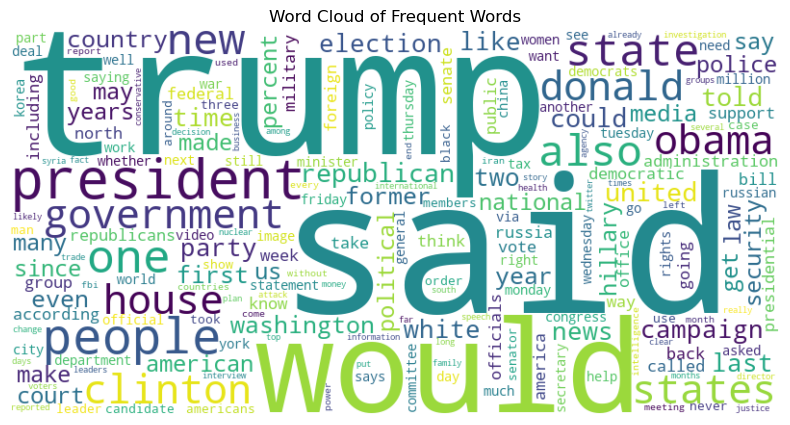

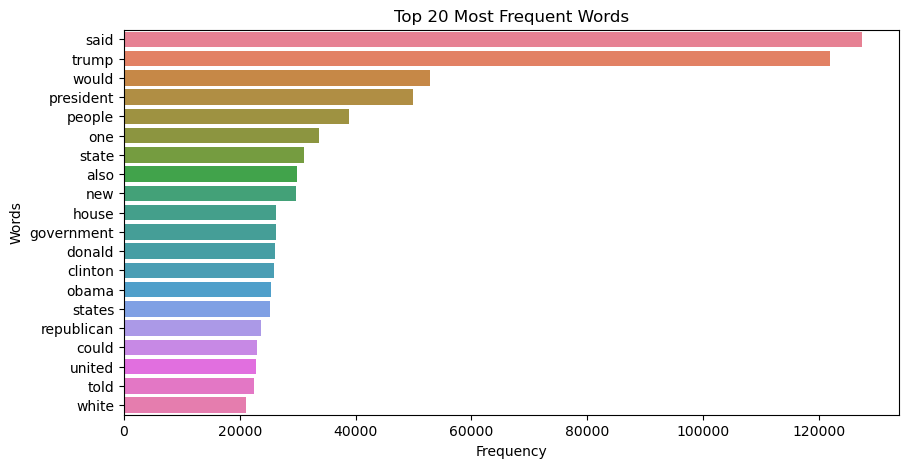

Average number of words per entry: 218.92


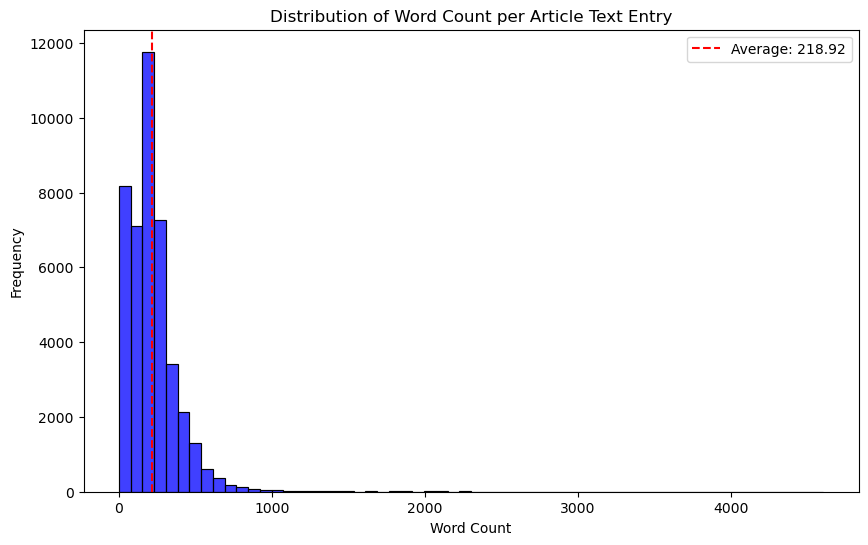

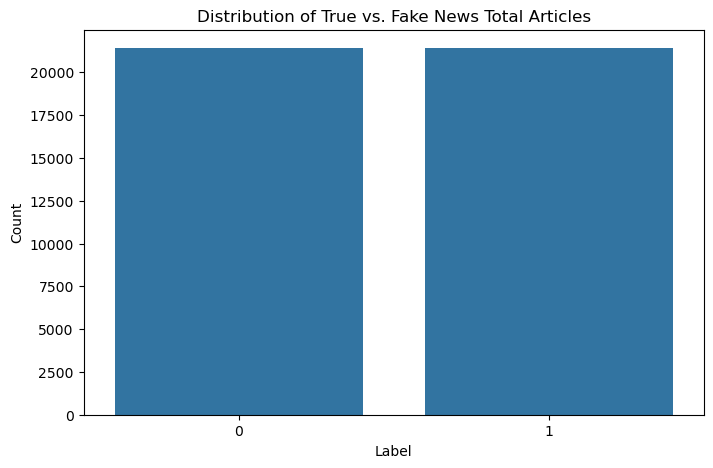

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Assuming combined_data contains 'text_tokenized_filtered' and 'label'

# 1. Word Frequency Analysis
# Flatten the list of tokenized words and count the occurrences of each word
all_words = [word for tokens in combined_data['text_tokenized_filtered'] for word in tokens]
word_counts = Counter(all_words)

# Most common words
most_common_words = word_counts.most_common(100)
print("Most common words and their frequencies:")
for word, count in most_common_words:
    print(f"{word}: {count}")

# 2. Word Cloud Visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words")
plt.show()

# 3. Frequency Distribution of Words
# Plot the top 20 most frequent words
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)
plt.figure(figsize=(10, 5))
sns.barplot(x=list(counts), y=list(words), hue=list(words), legend=False)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# 4. Average Number of Words per Text Entry
word_counts_per_entry = combined_data['text_tokenized_filtered'].apply(len)
avg_words_per_entry = word_counts_per_entry.mean()
print(f"Average number of words per entry: {avg_words_per_entry:.2f}")

# 5. Text Length Distribution (Word Count)
plt.figure(figsize=(10, 6))
sns.histplot(word_counts_per_entry, bins=60, color='blue')
plt.title('Distribution of Word Count per Article Text Entry')
plt.axvline(avg_words_per_entry, color='red', linestyle='--', label=f'Average: {avg_words_per_entry:.2f}')
plt.legend()
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# 8. Sentiment Distribution (if label represents sentiment)
# If labels are binary (0 and 1), you can plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=combined_data)
plt.title('Distribution of True vs. Fake News Total Articles')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [20]:
# Separate the data into true (label=1) and fake (label=0) articles
true_articles = combined_data[combined_data['label'] == 1]
fake_articles = combined_data[combined_data['label'] == 0]

# Flatten the tokenized words for true articles and fake articles
true_words = [word for tokens in true_articles['text_tokenized_filtered'] for word in tokens]
fake_words = [word for tokens in fake_articles['text_tokenized_filtered'] for word in tokens]

# Count word frequencies for both true and fake articles
true_word_counts = Counter(true_words)
fake_word_counts = Counter(fake_words)

# Get the most common words for true and fake articles (top 250)
most_common_true_words = true_word_counts.most_common(250)
most_common_fake_words = fake_word_counts.most_common(250)

# Print the most common words for true articles
print("Most common words in true articles:")
for word, count in most_common_true_words:
    print(f"{word}: {count}")

# Print the most common words for fake articles
print("\nMost common words in fake articles:")
for word, count in most_common_fake_words:
    print(f"{word}: {count}")

Most common words in true articles:
said: 99037
trump: 54249
would: 31526
president: 26397
state: 19728
government: 18288
new: 16784
house: 16519
states: 16515
also: 15946
united: 15576
republican: 15346
people: 15138
told: 14244
could: 13709
one: 12676
last: 12613
party: 12436
washington: 12419
two: 11620
election: 11482
year: 10972
former: 10601
campaign: 10561
donald: 10447
security: 10079
percent: 9937
north: 9870
clinton: 9457
white: 9443
court: 9406
senate: 9206
obama: 9197
country: 8700
minister: 8660
china: 8563
first: 8549
officials: 8474
since: 8332
tuesday: 8263
democratic: 8237
week: 8226
foreign: 8197
administration: 8194
national: 8184
including: 8119
presidential: 8011
wednesday: 8009
military: 7996
russia: 7826
may: 7811
law: 7802
tax: 7779
years: 7749
political: 7699
thursday: 7661
statement: 7563
friday: 7331
korea: 7236
support: 7136
monday: 7092
group: 7011
bill: 6902
vote: 6880
time: 6802
republicans: 6752
many: 6721
say: 6685
office: 6522
congress: 6473
federal: 6

In [21]:
# Convert the most common words into sets for easy comparison
true_words_set = set([word for word, _ in most_common_true_words])
fake_words_set = set([word for word, _ in most_common_fake_words])

# Find words that appear in true articles but not in fake articles
unique_true_words = true_words_set - fake_words_set

# Find words that appear in fake articles but not in true articles
unique_fake_words = fake_words_set - true_words_set

# Print the unique words that could lean towards being true or fake
print("Words that may lean towards an article being TRUE:")
for word in unique_true_words:
    print(word)

print("\nWords that may lean towards an article being FAKE:")
for word in unique_fake_words:
    print(word)


Words that may lean towards an article being TRUE:
attacks
crisis
earlier
force
killed
barack
recent
deal
official
set
talks
governor
ministry
iran
korea
defense
european
plan
trade
monday
myanmar
committee
lawmakers
months
likely
decision
conference
coalition
executive
turkey
expected
moscow
opposition
groups
top
local
efforts
held
saturday
china
north
south
thursday
meeting
syria
agreement
international
leaders
legal
friday
head
union
four
major
later
prime
legislation
parliament
region
mexico
issues
immigration
senior
possible
health
nuclear
representatives
companies
human
nations
chief
among
tuesday
comment
ruling
control
wednesday
spokesman
britain
syrian
capital
minister
program
agency
council
sunday
saudi
islamic
issue
plans
forces
iraq
month
tax
border
financial
leader
seen
economic
move
added
budget
sanctions
countries
billion
eu
reporters
ban

Words that may lean towards an article being FAKE:
care
children
give
right
come
good
community
money
stop
march
real
course
fbi
cruz


In [22]:
combined_data.iloc[0]['text_tokenized_filtered']

['washington',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'pay',
 'tax',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'way',
 'among',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'cbs',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'even',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'keep',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'big',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'also',
 'want',
 'proportional',
 'increases',
 

In [29]:
combined_data

,title,text,subject,date,label,text_tokenized,text_tokenized_filtered
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"[WASHINGTON, (, Reuters, ), -, The, head, of, ...","[washington, head, conservative, republican, f..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,"[WASHINGTON, (, Reuters, ), -, Transgender, pe...","[washington, transgender, people, allowed, fir..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,"[WASHINGTON, (, Reuters, ), -, The, special, c...","[washington, special, counsel, investigation, ..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,"[WASHINGTON, (, Reuters, ), -, Trump, campaign...","[washington, trump, campaign, adviser, george,..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,"[SEATTLE/WASHINGTON, (, Reuters, ), -, Preside...","[president, donald, trump, called, postal, ser..."
...,...,...,...,...,...,...,...
42829,The Rolling Stones Are DONE With Trump Using ...,The Rolling Stones are now on a growing list o...,News,"May 4, 2016",0,"[The, Rolling, Stones, are, now, on, a, growin...","[rolling, stones, growing, list, rock, stars, ..."
42830,Trump Goes DISGUSTINGLY Low With Assault On H...,"During the first presidential debate, Donald T...",News,"September 29, 2016",0,"[During, the, first, presidential, debate, ,, ...","[first, presidential, debate, donald, trump, t..."
42831,TRANSGENDER PRISONER IN CA JAIL FOR MURDER IS ...,Just when you find yourself wondering if the w...,left-news,"Aug 11, 2015",0,"[Just, when, you, find, yourself, wondering, i...","[find, wondering, world, gone, completely, mad..."
42832,Red Cross Raises Tens Of Millions And You Won...,Americans are opening their wallets and donati...,News,"September 9, 2017",0,"[Americans, are, opening, their, wallets, and,...","[americans, opening, wallets, donating, relief..."
